In [61]:
import pandas as pd
import seaborn as sns


In [62]:
df = pd.read_csv("fones_bluetooth.csv")

In [63]:
df.head()

,Unnamed: 0,titulo,preco,vendidos,rating,frete,loja
0,0,Original xiaomi redmi airdots 2 fone de ouvido...,"R$29,97",35021 vendido(s),4.5,Frete grátis,Shop911531059 Store
1,1,Original tws y60 fone de ouvido bluetooth sem ...,"R$20,62",1745 vendido(s),4.9,Frete grátis,Shop911531056 Store
2,2,Novo original lenovo lp40 tws fone de ouvido s...,"R$66,97",70851 vendido(s),4.6,Frete grátis,Mobile Phone Online Store
3,3,I7s tws fones de ouvido sem fio bluetooth 5.0 ...,"R$10,01",3901 vendido(s),4.5,"+ envio: R$ 13,71",VIKEFON Official Store
4,4,Lenovo xt80 bluetooth 5.3 fones de ouvido sem ...,"R$87,7",1253 vendido(s),4.9,Frete grátis,Lenovo Original Digital Store


# Limpando o preço

In [64]:
df.preco = df.preco.apply( lambda x: float(x.replace("R$", '').replace(",", '.')))

In [65]:
df.head()

,Unnamed: 0,titulo,preco,vendidos,rating,frete,loja
0,0,Original xiaomi redmi airdots 2 fone de ouvido...,29.97,35021 vendido(s),4.5,Frete grátis,Shop911531059 Store
1,1,Original tws y60 fone de ouvido bluetooth sem ...,20.62,1745 vendido(s),4.9,Frete grátis,Shop911531056 Store
2,2,Novo original lenovo lp40 tws fone de ouvido s...,66.97,70851 vendido(s),4.6,Frete grátis,Mobile Phone Online Store
3,3,I7s tws fones de ouvido sem fio bluetooth 5.0 ...,10.01,3901 vendido(s),4.5,"+ envio: R$ 13,71",VIKEFON Official Store
4,4,Lenovo xt80 bluetooth 5.3 fones de ouvido sem ...,87.70,1253 vendido(s),4.9,Frete grátis,Lenovo Original Digital Store


# Limpando coluna vendidos

In [66]:
df.vendidos = df.vendidos.apply( lambda x: int(x.split()[0]))

In [67]:
df.head()

,Unnamed: 0,titulo,preco,vendidos,rating,frete,loja
0,0,Original xiaomi redmi airdots 2 fone de ouvido...,29.97,35021,4.5,Frete grátis,Shop911531059 Store
1,1,Original tws y60 fone de ouvido bluetooth sem ...,20.62,1745,4.9,Frete grátis,Shop911531056 Store
2,2,Novo original lenovo lp40 tws fone de ouvido s...,66.97,70851,4.6,Frete grátis,Mobile Phone Online Store
3,3,I7s tws fones de ouvido sem fio bluetooth 5.0 ...,10.01,3901,4.5,"+ envio: R$ 13,71",VIKEFON Official Store
4,4,Lenovo xt80 bluetooth 5.3 fones de ouvido sem ...,87.70,1253,4.9,Frete grátis,Lenovo Original Digital Store


# Limpando frete

In [68]:
df['valor_frete'] = df.frete.apply( lambda x: 0 if x == 'Frete grátis' else float(x.split()[-1].replace(",", '.')))
df.frete = df.frete.apply( lambda x: 'Grátis' if x == 'Frete grátis' else 'Pago')

In [69]:
df.head()

,Unnamed: 0,titulo,preco,vendidos,rating,frete,loja,valor_frete
0,0,Original xiaomi redmi airdots 2 fone de ouvido...,29.97,35021,4.5,Grátis,Shop911531059 Store,0.00
1,1,Original tws y60 fone de ouvido bluetooth sem ...,20.62,1745,4.9,Grátis,Shop911531056 Store,0.00
2,2,Novo original lenovo lp40 tws fone de ouvido s...,66.97,70851,4.6,Grátis,Mobile Phone Online Store,0.00
3,3,I7s tws fones de ouvido sem fio bluetooth 5.0 ...,10.01,3901,4.5,Pago,VIKEFON Official Store,13.71
4,4,Lenovo xt80 bluetooth 5.3 fones de ouvido sem ...,87.70,1253,4.9,Grátis,Lenovo Original Digital Store,0.00


# criando novo atributo

In [70]:
df['preco_total'] = df.preco + df.valor_frete
df['total_vendido'] = df.vendidos * df.preco

In [71]:
df.head()

,Unnamed: 0,titulo,preco,vendidos,rating,frete,loja,valor_frete,preco_total,total_vendido
0,0,Original xiaomi redmi airdots 2 fone de ouvido...,29.97,35021,4.5,Grátis,Shop911531059 Store,0.00,29.97,1049579.37
1,1,Original tws y60 fone de ouvido bluetooth sem ...,20.62,1745,4.9,Grátis,Shop911531056 Store,0.00,20.62,35981.90
2,2,Novo original lenovo lp40 tws fone de ouvido s...,66.97,70851,4.6,Grátis,Mobile Phone Online Store,0.00,66.97,4744891.47
3,3,I7s tws fones de ouvido sem fio bluetooth 5.0 ...,10.01,3901,4.5,Pago,VIKEFON Official Store,13.71,23.72,39049.01
4,4,Lenovo xt80 bluetooth 5.3 fones de ouvido sem ...,87.70,1253,4.9,Grátis,Lenovo Original Digital Store,0.00,87.70,109888.10


# Análises

#### analisando correlação dos dados

In [72]:
dados_corr = df[['preco', 'vendidos', 'rating', 'valor_frete', 'preco_total']]

In [73]:
dados_corr.corr()

,preco,vendidos,rating,valor_frete,preco_total
preco,1.000000,0.003420,-0.078250,-0.333467,0.994031
vendidos,0.003420,1.000000,0.088321,-0.099860,-0.008024
rating,-0.078250,0.088321,1.000000,0.058169,-0.074071
valor_frete,-0.333467,-0.099860,0.058169,1.000000,-0.228623
preco_total,0.994031,-0.008024,-0.074071,-0.228623,1.000000


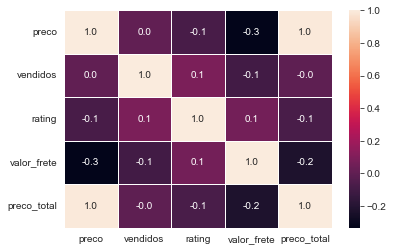

In [74]:
plot = sns.heatmap(dados_corr.corr(), annot = True, fmt=".1f", linewidths=.6)

#### existem correlações fracas entre os dados. Aparentemente quando o frete aumenta, o preço diminui e quando o preço aumenta o frete diminui

# Quantidade de vendas em relação ao preço total

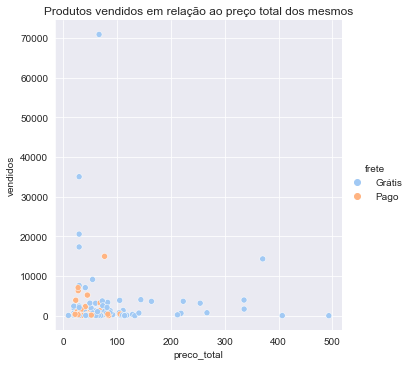

In [75]:

sns.set_palette('pastel')
sns.set_style('darkgrid')
ax = sns.relplot(
    data= df,
    x="preco_total", y="vendidos", hue = 'frete',
).set(title='Produtos vendidos em relação ao preço total dos mesmos')


# Quantidade de vendas em relação ao rating

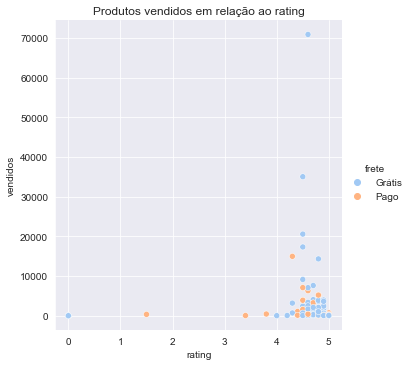

In [76]:
sns.set_palette('pastel')
sns.set_style('darkgrid')
ax = sns.relplot(
    data= df,
    x="rating", y="vendidos", hue = 'frete',
).set(title='Produtos vendidos em relação ao rating')


# Preço total em relação ao rating

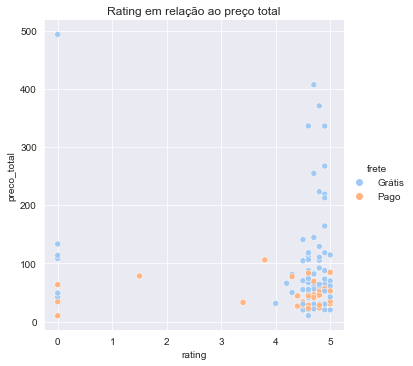

In [77]:
sns.set_palette('pastel')
sns.set_style('darkgrid')
ax = sns.relplot(
    data= df,
    x="rating", y="preco_total", hue = 'frete',
).set(title='Rating em relação ao preço total')


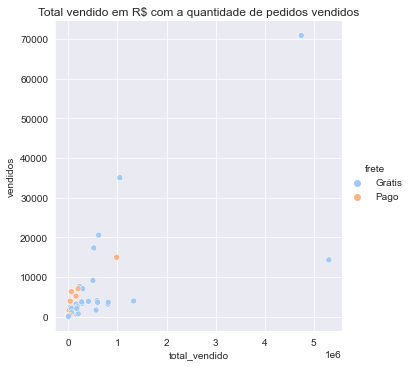

In [94]:
sns.set_palette('pastel')
sns.set_style('darkgrid')
ax = sns.relplot(
    data= df,
    x="total_vendido", y="vendidos", hue = 'frete',
).set(title='Total vendido em R$ com a quantidade de pedidos vendidos')


#### Percebe-se que o produto que mais faturou não foi aquele que teve a maior quantidade de vendas

In [78]:
df.describe()

,Unnamed: 0,preco,vendidos,rating,valor_frete,preco_total,total_vendido
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,1.200000e+02
mean,59.500000,74.152250,2651.700000,4.238333,5.119667,79.271917,1.988340e+05
std,34.785054,83.979657,7739.568512,1.404745,9.411300,81.326740,6.728478e+05
min,0.000000,5.000000,0.000000,0.000000,0.000000,9.960000,0.000000e+00
25%,29.750000,29.970000,89.750000,4.500000,0.000000,30.340000,3.053172e+03
50%,59.500000,50.025000,421.000000,4.700000,0.000000,54.975000,2.302532e+04
75%,89.250000,82.980000,2143.750000,4.900000,7.655000,83.580000,1.037366e+05
max,119.000000,493.300000,70851.000000,5.000000,46.680000,493.300000,5.305308e+06


# Empresa com maior valor vendido

In [91]:
df[ df.total_vendido == df.total_vendido.max()]

,Unnamed: 0,titulo,preco,vendidos,rating,frete,loja,valor_frete,preco_total,total_vendido
31,31,Soundcore by Anker Life Q30 fone de ouvido sem...,370.56,14317,4.8,Grátis,ANKER Official Store,0.0,370.56,5305307.52


#### Total de R$ 5.305.307,52 em vendas

# Média de preço

In [79]:
print("Preço médio de {} com um desvio padrão de {}".format(round(df.preco.mean(),2), round(df.preco.std(),2)))


Preço médio de 74.15 com um desvio padrão de 83.98


# Média do valor do frete

In [80]:
print("Preço médio do frete de {} com um desvio padrão de {}".format(round(df.valor_frete.mean(),2), round(df.valor_frete.std(),2)))


Preço médio do frete de 5.12 com um desvio padrão de 9.41


# Média do preço total

In [81]:
print("Preço total médio total de {} com um desvio padrão de {}".format(round(df.preco_total.mean(),2), round(df.preco_total.std(),2)))

Preço total médio total de 79.27 com um desvio padrão de 81.33


# Lojas presentes no conjunto e a quantidade de fones que elas vendem

In [82]:
df.loja.value_counts()

Shop911531059 Store             3
Mobile Phone Online Store       3
HSQJ 3C Official Store          2
RFMicron Official Store         2
ANKER Official Store            2
                               ..
Shop1100022014 Store            1
LJSHU 3C Store                  1
The Star Of Sennheiser Store    1
SoundPEATS Official Store       1
XIci Store                      1
Name: loja, Length: 105, dtype: int64

## Quantidade de fones vendidos pelas lojas

In [83]:
df.groupby('loja').sum()[['vendidos']].sort_values(by = ['vendidos'], ascending = False)

,vendidos
loja,
Mobile Phone Online Store,75374
Shop911599217 Store,37894
Shop911531059 Store,37003
ANKER Official Store,18273
Global Headphones Store,14964
...,...
TONGYUE MALL Store,6
HiMISS Global Store,4
LEMFO Europe Store,2


# Filtrando produtos por uma marca

In [84]:
xiaomi = df[df['titulo'].str.contains('xiaomi')]

#### Media de preco dos fones da xiaomi no aliexpress, segundo a amostra

In [85]:
xiaomi.preco_total.mean()

73.86833333333333

#### Media das avaliações dos fones da Xiaomi no aliexpress

In [86]:
xiaomi.rating.mean()

4.199999999999999

## Fone mais vendido da xiaomi

In [87]:
xiaomi[xiaomi.vendidos == xiaomi.vendidos.max()]

,Unnamed: 0,titulo,preco,vendidos,rating,frete,loja,valor_frete,preco_total,total_vendido
0,0,Original xiaomi redmi airdots 2 fone de ouvido...,29.97,35021,4.5,Grátis,Shop911531059 Store,0.0,29.97,1049579.37


##### apenas com esse fone, a empresa deve ter faturado aproximadamente 1.049.579,37 reais

## Loja que mais tem produtos da xiaomi

In [90]:
xiaomi.loja.value_counts()

Shop911599217 Store                         2
Shop911531059 Store                         1
Shop 6600321006 Store                       1
Shop1102119167 Store                        1
TONGYUE MALL Store                          1
Mi Authorized Experience Store              1
RJYLZOfficial Store                         1
LEEDOAR Factory Store                       1
JOENEL Official Store                       1
3C Happyday Store                           1
Ybding Store                                1
JOOJZ Store                                 1
lamellate Store                             1
Xiaomi Original Earphones Official Store    1
3CC Smart Tech Global Store                 1
Qearfun Global Store                        1
BASEUS Co.,Ltd. Store                       1
Name: loja, dtype: int64